# <a id='toc1_'></a>[Spectroscopy of atom lights](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Spectroscopy of atom lights](#toc1_)    
  - [Load data](#toc1_1_)    
  - [Show the raw & filtered data](#toc1_2_)    
  - [Extract spectrum](#toc1_3_)    
  - [Analyse des lampes](#toc1_4_)    
  - [Extraction des raies](#toc1_5_)    
  - [Extract references from the web](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

The goal is to identify the atoms

This notebook focuses on analyzing the spectral data of atom lights to identify the atoms present. By processing the raw data, filtering it, and extracting spectral lines, we aim to match the detected wavelengths with reference data for various atoms.

In [1]:
# %matplotlib ipympl # for interactive plots

import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
import sys
sys.path.append("..")
import xspectra.utils as utils
import xspectra.atom as atom
import xspectra.visualization as vis

## <a id='toc1_1_'></a>[Load data](#toc0_)

In [ ]:
data_folder = "./data/atom_lights"
filename = "one_shot.SPE" # Ne-Ar light at lambda = 540 nm
data = utils.load_data(os.path.join(data_folder, filename))


## <a id='toc1_2_'></a>[Show the raw & filtered data](#toc0_)

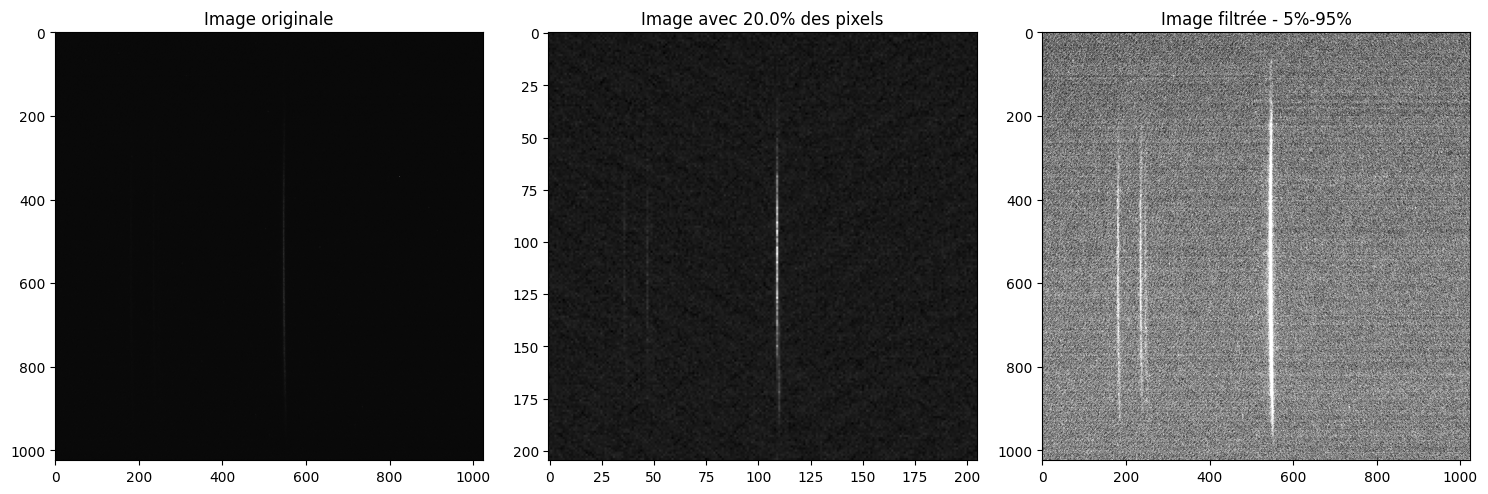

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Premier graphique
ratio_quality = 1
axs[0].imshow(data[::ratio_quality, ::ratio_quality], cmap='gray')
axs[0].set_title('Image originale')

# Deuxième graphique
ratio_quality = 5
axs[1].imshow(data[::ratio_quality, ::ratio_quality], cmap='gray')
axs[1].set_title(f'Image avec {100/ratio_quality}% des pixels')

# Troisième graphique
ratio_quality = 1
filter_value = 5
filtered_data = utils.filter_data(data, filter_value)
axs[2].imshow(filtered_data[::ratio_quality, ::ratio_quality], cmap='gray')
axs[2].set_title(f'Image filtrée - {filter_value}%-{100-filter_value}%')

plt.tight_layout()
plt.savefig("./res/filtering.png")
plt.show()


## <a id='toc1_3_'></a>[Extract spectrum](#toc0_)

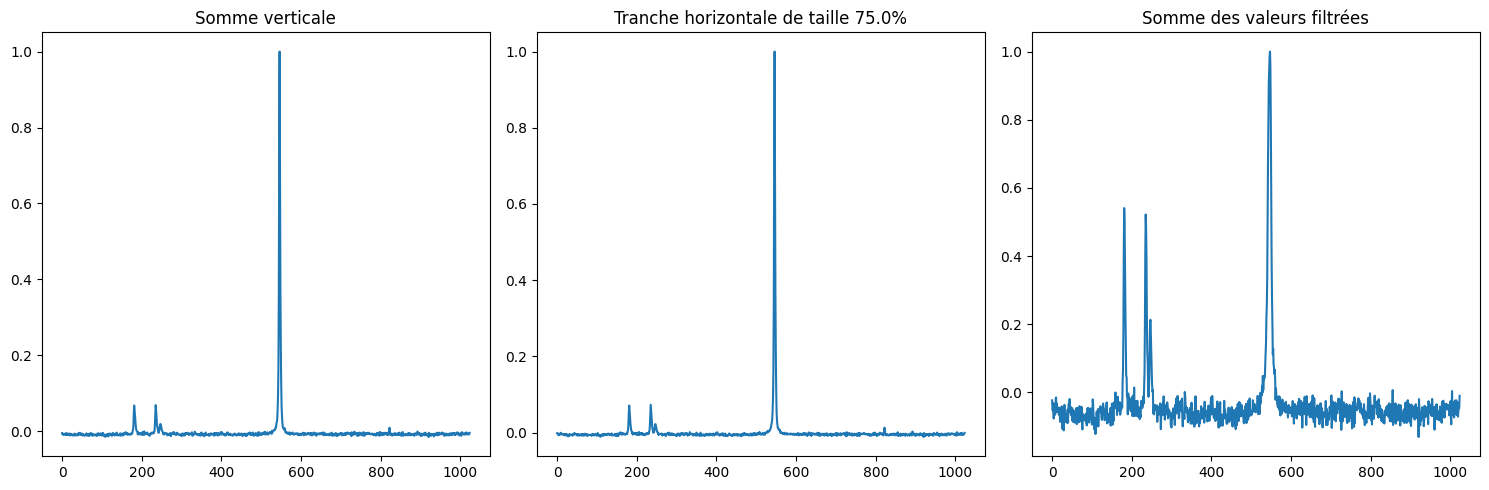

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
full_path = os.path.join(data_folder, filename)

# Graphe pour la somme verticale
axs[0].plot(utils.extract_spectrum(full_path, cut_proportion=None, filter_data_value=None))
axs[0].set_title('Somme verticale')

# Graphe pour la tranche horizontale
axs[1].plot(utils.extract_spectrum(full_path, cut_proportion=0.75, filter_data_value=None))
axs[1].set_title(f'Tranche horizontale de taille {0.75*100}%')

# Graphe pour la somme des valeurs filtrées
axs[2].plot(utils.extract_spectrum(full_path, cut_proportion=0.75, filter_data_value=5))
axs[2].set_title('Somme des valeurs filtrées')

plt.tight_layout()
plt.show()
# plt.savefig("spectrum.png")

## <a id='toc1_4_'></a>[Analyse des lampes](#toc0_)

In [ ]:
file = "light1.SPE"
full_path = os.path.join(data_folder, file)


# data_l1 = imageio.imread(file)

# spectrum_l1 = np.sum(data_l1, axis=0)
# spectrum_l1 /= max(spectrum_l1) # Normalisation de l'intensité

spectrum_l1 = utils.extract_spectrum(full_path, cut_proportion=0.75, filter_data_value=None, normalize=True)


# we get the wavelengths by knowing the resolution of the spectrometer
# and the range of wavelengths
resolution = 36.6739e-12
largeur_plage = len(spectrum_l1)*resolution

l_min = 200e-9
l_max = 850e-9

longueurs_onde = np.linspace(l_min, l_max, len(spectrum_l1))* 1e9



## <a id='toc1_5_'></a>[Extraction des raies](#toc0_)

Pour cela on utilise [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) de `scipy`

<Figure size 640x480 with 0 Axes>

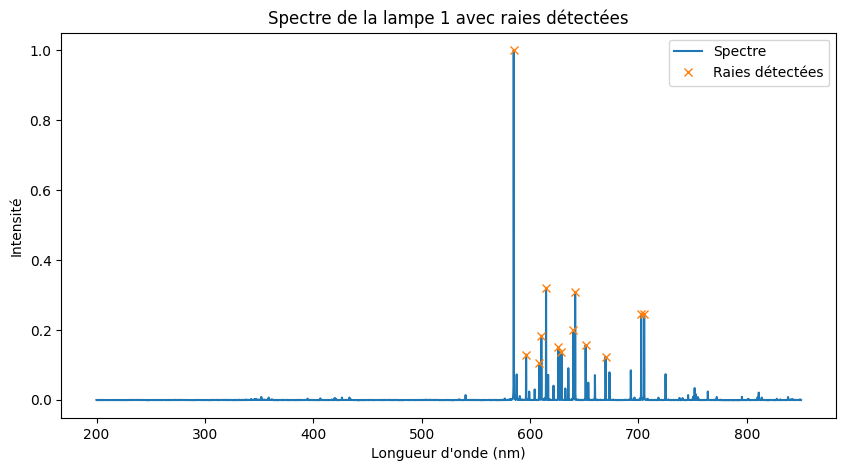

Longueurs d'onde des raies détectées (nm):
13


<Figure size 640x480 with 0 Axes>

In [7]:
from scipy.signal import find_peaks # très utile pour détecter les pics dans un spectre
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

# Détection des pics dans le spectre
peaks, _ = find_peaks(spectrum_l1, height=0.1) # On fixe une hauteur minimale


# Affichage du spectre avec les pics détectés
plt.clf()
plt.figure(figsize=(10, 5))
plt.plot(longueurs_onde, spectrum_l1, label='Spectre')
plt.plot(longueurs_onde[peaks], spectrum_l1[peaks], 'x', label='Raies détectées')
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité")
plt.title("Spectre de la lampe 1 avec raies détectées")
plt.legend()
plt.show()

plt.savefig("spectre_l1.png")

# Affichage des longueurs d'onde des raies détectées
raies_detectees = longueurs_onde[peaks]
print("Longueurs d'onde des raies détectées (nm):")
print(len(raies_detectees))

In [ ]:
# Exemple d'utilisation
raies_l1 = longueurs_onde[utils.extract_raies(spectrum_l1)]
raies_l1

array([540.51286391, 584.9243963 , 587.63823065, 590.49875875,
       596.32983525, 599.19036335, 604.25129768, 608.35872264,
       610.37576168, 614.7399007 , 616.64691943, 621.63450688,
       626.18201309, 628.96919431, 632.52651772, 635.2770255 ,
       639.78785827, 641.58485669, 651.2666441 , 653.68709095,
       659.84822839, 669.64003611, 673.23403295, 692.96434213,
       702.49943579, 705.24994358, 725.0169262 , 745.77409163,
       751.82520876, 752.81539156, 763.96411645, 810.97946288])

## <a id='toc1_6_'></a>[Extract references from the web](#toc0_)

In [9]:
atoms = ["Hg I", "H I", "He I", "Ne I", "Ar I", "Kr I", "Xe I", "Cd I", "Zn I", "Na I"]
rays = [atom.get_best_rays(a, top=10)[0] for a in atoms]

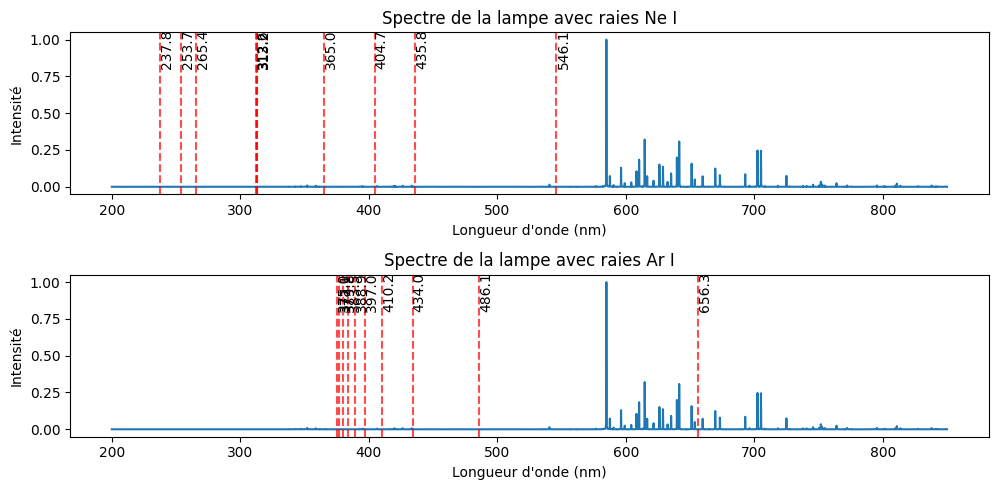

In [10]:
vis.plot_spectra_with_rays(spectrum_l1, longueurs_onde, rays, spectra_output="spectra_with_rays.png")

In [14]:

# Exemple d'utilisation
scores = [atom.score_rays(raies_l1, raies_atom) for raies_atom in rays]
nb_matches = [atom.get_nb_matches(raies_l1, raies_atom) for raies_atom in rays]
# Create a DataFrame to display the results as a table
results_df = pd.DataFrame({
    "Atome": atoms,
    "Score des raies": [f"{score:.2f}" for score in scores],
    "Nombre de raies détectées": nb_matches
})

# Display the table
results_df

,Atome,Score des raies,Nombre de raies détectées
0,Hg I,46518.23,0
1,H I,17944.27,0
2,He I,nan,2
3,Ne I,263.80,5
4,Ar I,241.44,4
5,Kr I,5339.42,2
6,Xe I,1483.44,1
7,Cd I,27558.68,0
8,Zn I,50352.76,0
9,Na I,16656.22,2


Le score correspond à la distance au carré à la raie la plus proche.

Il y a match quand la raie est à une instance inférieure à une tolérance (fixée dans les paramètres optionnels).

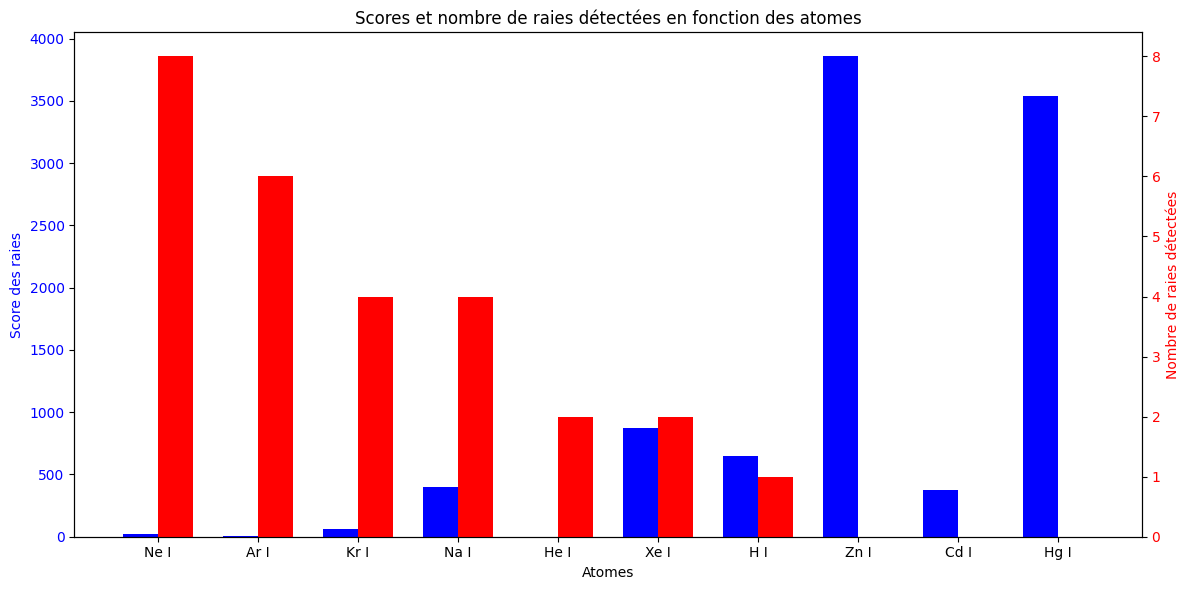

In [18]:
vis.plot_scores_and_matches(atoms, scores, nb_matches, scores_output="./res/atoms_scores") # To visualise the results

On a bien de l'argon et du néon dans cette lampe, ainsi qu'un peu d'Hélium.

`vis.analyse_spectrum` nous permet de faire toute l'analyse automatiquement : 

Nombre de raies détectées: 48
Scor Hg 3537.1220562531807
Nb match Hg 0


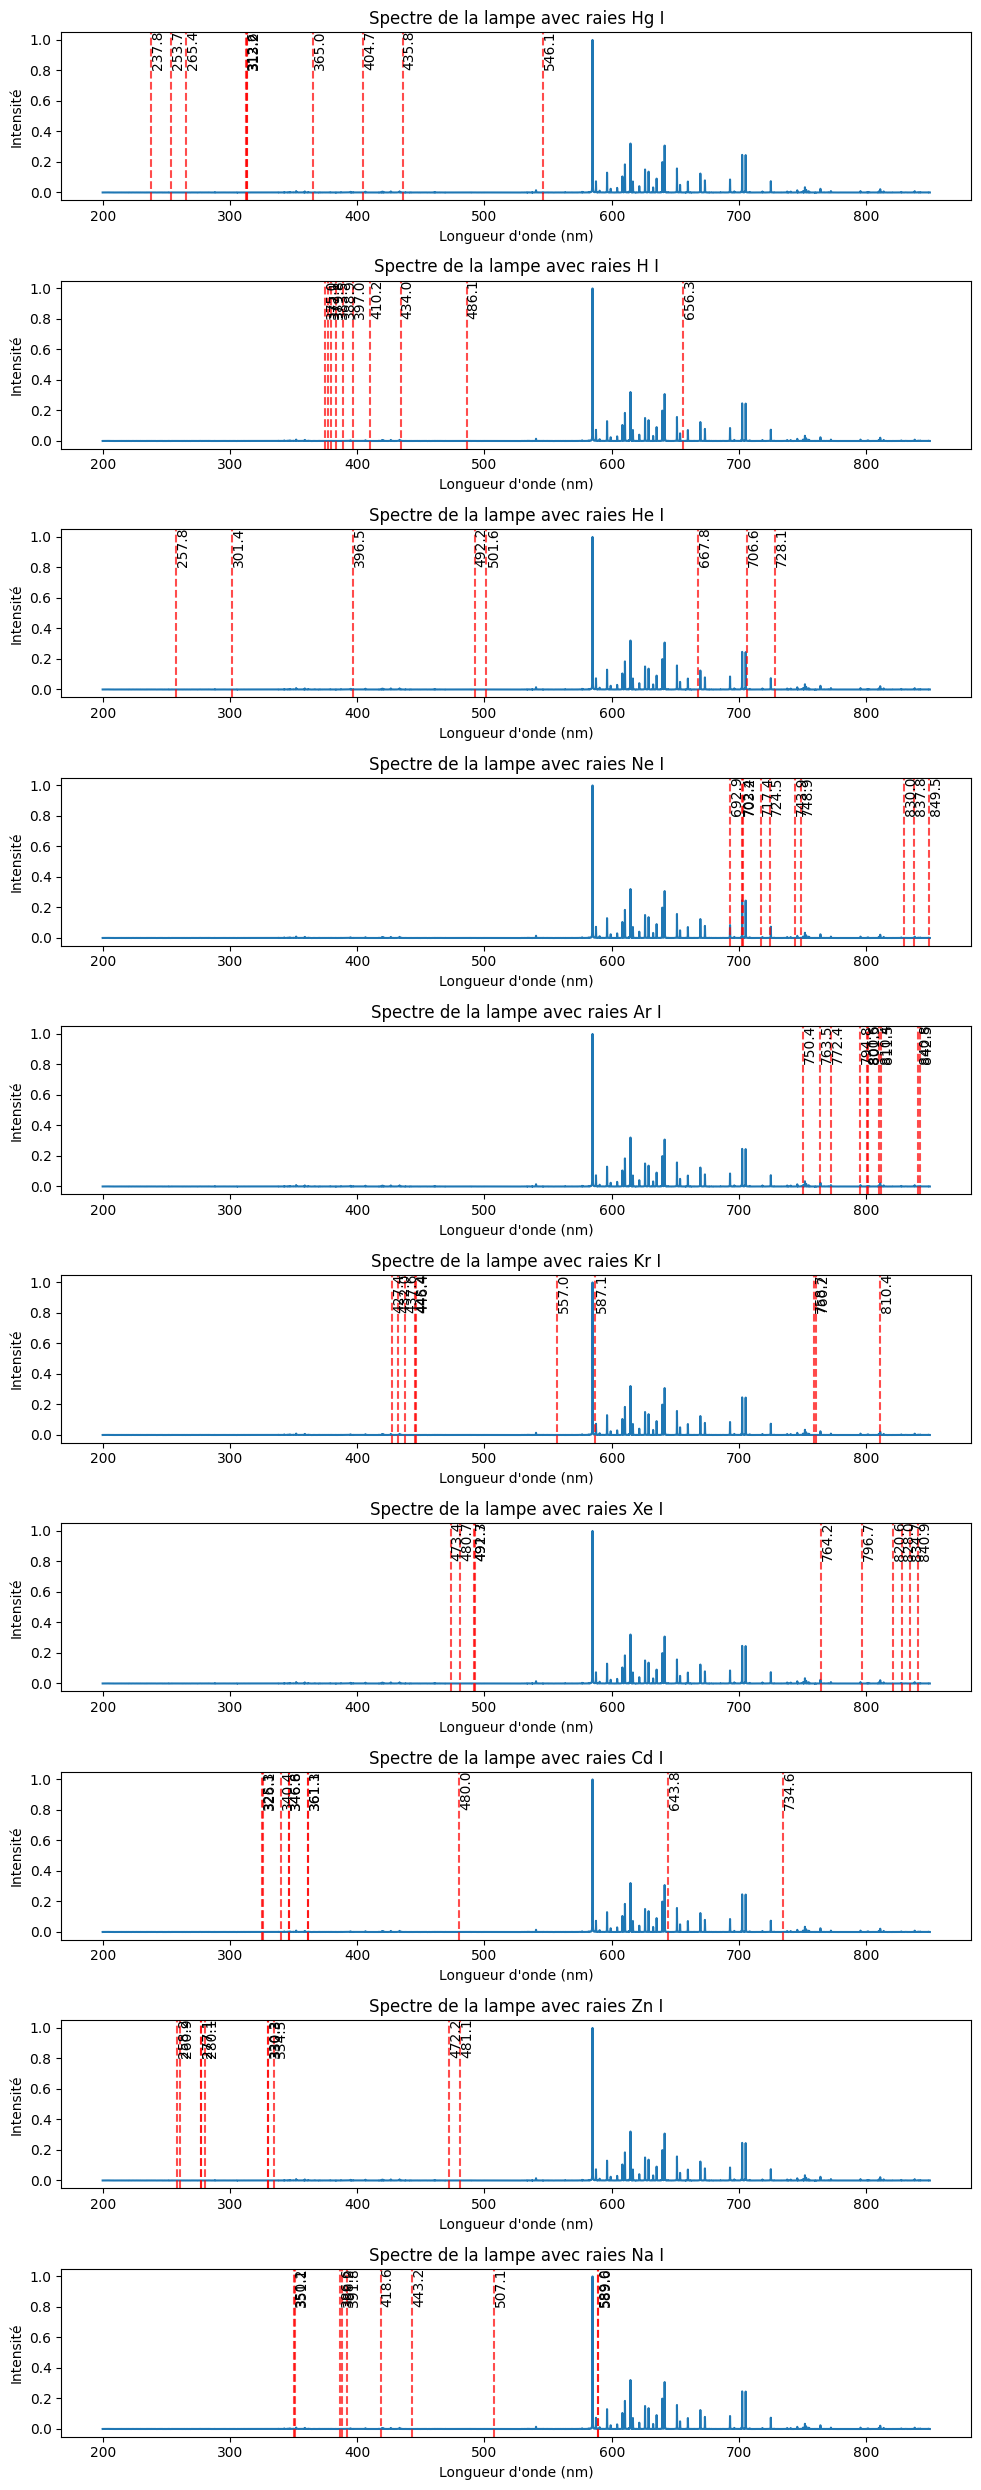

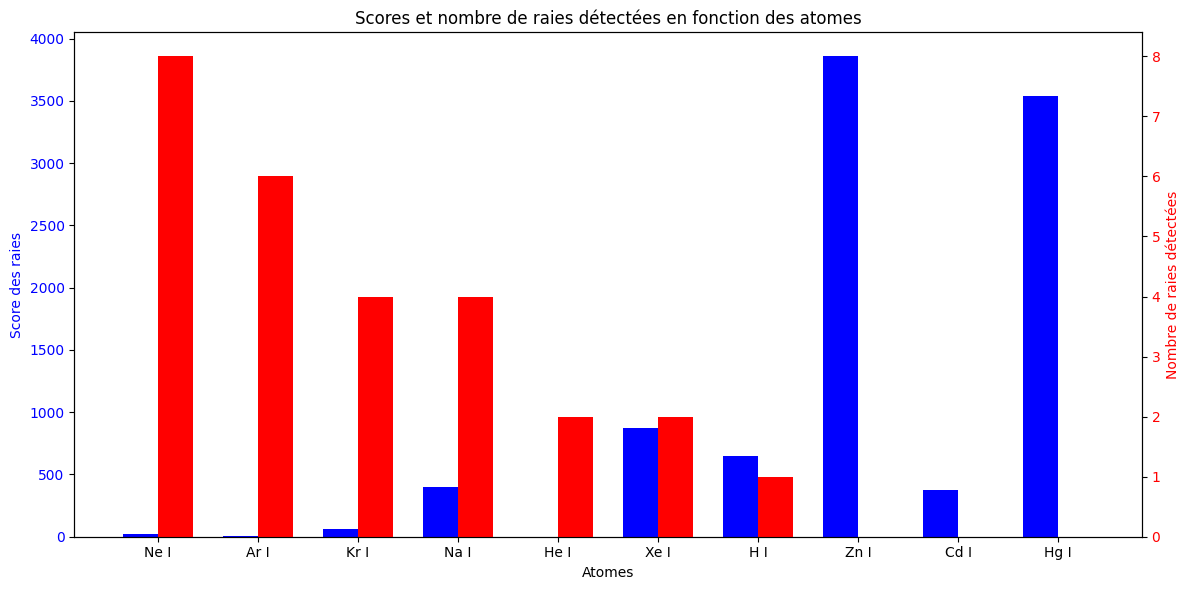

In [17]:
scores, nb_matches = vis.analyse_spectrum(os.path.join(data_folder, "light1.SPE"), l_min=200, l_max=850, height=5e-3)